In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Aca implementare el metodo del trapezoide con espacio uniforme 

<img src="trapezoid(Nouniform).png">
<img src="trapezoid(uniform).png">

In [3]:
# Metodo del trapecio para uniforme y no uniforme puntos
def trapezoid(funcion=None,inf=None,sup=None,n=1,uniform=True,data=None):
    '''
    - funcion = funcion a integrar
    - inf , sup = son los limites a integrar 
    - n = el numero intervalos 
    - uniform = True si los intervalos estan igualmente espaciados , False si es lo contrario
    - en el caso de uniform == False , debera pasarse la data donde esta los puntos para hacer el metodo de trapecio
    - Suponemos que la data esta ordenada como deberia para la integracion
    '''
       
    # en el caso que tengamos una distribucion uniforme
    if uniform == True:
        h = (sup-inf)/n
        suma = 1/2*(funcion(inf)+funcion(sup))
        
        # tiene que ser de 1-n y no n-1 debido a como recorre el for (limitacion de python)
        # y ademas ya que no estamos trabajando con listas sino con los indices realmente
        for i in range(1,n):
            x = inf + i*h
            suma = suma + funcion(x)
        suma = suma * h 
    
    # en caso no tenga distribucion uniforme
    else : 
        n = data.shape[1] # con esto consigo cuantos eelemntos tiene mi data
        
        # comenzamos la suma 
        # como ahora si trabajamos con listas(array) ahora si debo poner n-1
        suma = 0
        for j in range(0,n-1):
            suma = suma + 1/2*(data[0,j+1]-data[0,j])*(data[1,j]+data[1,j+1])  
    
    return suma    

In [4]:
# Probemos nuestro metodo si funciona
def funcionprob(x):
    return np.float64(np.e**(-x**2))

# armamos la data ejemplo
x1 = [0.0,0.2,0.4,0.6,0.8,1.0]
x2 = [1.0,0.99335,0.97355,0.94107,0.89670,0.84147]
dataprueba = np.array([x1,x2],dtype=np.float64)

valor1 = trapezoid(funcion=funcionprob,inf=0,sup=1,n=60,uniform=True)
valor2 = trapezoid(uniform=False,data=dataprueba)
valor1,valor2

(0.7468071011991205, 0.9450810000000001)

# Aca implementare el metodo de la regla de simpson's 1/3

<img src="simpson.png">

In [5]:
# definire el metodo de simpsom 1/3

def simpson_1_3(funcion=None,inf=None,sup=None,n=1):
    '''
    # funcion = funcion que se hara el metodo
    # inf , sup = limites de integracion
    # n = numero de intervalor que seran divididos para que ( n puede ser par o impar "OJO")
    # en cada intervalo se haga el metodo de regla de simpso's  
    '''
    # al final lo que se intercala es 2*n itervalos iguales
    n = 2*n # esto lo hago con fines de clarificar el codigo
    h = (sup-inf)/n # si no hubiera hecho lo de arriba aca seria 2n en vez de n  
    suma = (funcion(inf)+funcion(sup))
    # yo se que n es divisible siempre por 2 por las lineas de codigo arriba
    suma1 = 0
    for i in range(1,int(n/2+1) ):
        x = inf + (2*i-1)*h
        suma1 = suma1 + funcion(x)
    
    suma2 = 0
    for i in range(1,int((n-2)/2 + 1) ):
        x = inf + (2*i*h)
        suma2 = suma2 + funcion(x)
    
    suma = h/3*(suma + 4*suma1 + 2*suma2)
    
    return suma

In [6]:
# veamos si funcion mi metodo de simpson 1/3
def funcionprob2(x):
    return np.float64(np.cos(2*x)/np.e**(x))

valor = simpson_1_3(funcion=funcionprob2,inf=0,sup=5/4*np.pi,n=10)
valor

0.20778906451292053

# Aca implementare el metodo compuesto de la regla de simpson 3/8

In [7]:
# definire el metodo de simpsom 3/8 es igual al de 1/3
def simpson_3_8(funcion=None,inf=None,sup=None,n=1):
    '''
    # funcion = funcion que se hara el metodo
    # inf , sup = limites de integracion
    # n = numero de intervalor que seran divididos para que ( n puede ser multiipo de 3 o no "OJO")
    # en cada intervalo se haga el metodo de regla de simpso's  
    '''
    # al final lo que se intercala es 3*n itervalos iguales
    n = 3*n # esto lo hago con fines de clarificar el codigo
    h = (sup-inf)/n # si no hubiera hecho lo de arriba aca seria 3n en vez de n  
    suma = (funcion(inf)+funcion(sup))
    # yo se que n es divisible siempre por 2 por las lineas de codigo arriba
    suma1 = 0
    for i in range(1,n):
        x = inf + i*h
        if i % 3 == 0:
            continue # sigue el for peor no completa esta iteracion
        suma1 = suma1 + funcion(x)
    
    suma2 = 0
    for i in range(1,int(n/3)):
        x = inf + (3*i*h)
        suma2 = suma2 + funcion(x)
    
    suma = 3*h/8*(suma + 3*suma1 + 2*suma2)
    
    return suma

In [8]:
# veamos si funcion mi metodo de simpson 3/8
def funcionprob2(x):
    return np.float64(np.sin(x))

valor = simpson_3_8(funcion=funcionprob2,inf=0,sup=np.pi,n=3)
valor

2.0003822420892665

# Aca implementare la extrapolacion de Richardson

<img src="richardson.png">

In [9]:
# aca implementare richardson
# recuerda que esto solo funciona con el trapecio compuesto
# por ahora pienso que int2 > int1 ( pregunta pendiente )
def richardson(int1,h1,int2,h2):
    return int2 + (1/( (h1/h2)**2-1))*(int2-int1)

# Ejercicio 1

//////////////// Pregunta 1 DE INTEGRACION NUMERICA I/////////////////////
El valor de la integral analiticamente es :1104.0
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=1 es 5280.0
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=2 es 2634.0
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=4 es 1516.875
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de simpson 1/3 es 1752.0
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de simpson 3/8 es 1392.0
----------------------------------------------------------------------

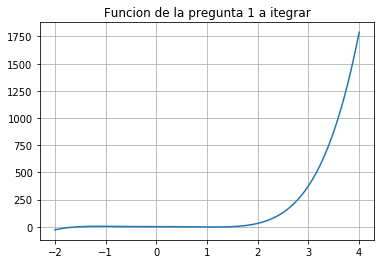

In [13]:
print("//////////////// Pregunta 1 DE INTEGRACION NUMERICA I/////////////////////")
# definimos la funcion
def funcionprob1(x):
    return 1-x-4*x**3+2*x**5

# graficamos para tener una idea de lo que estamos integrando
rango = np.linspace(-2,4,100)
plt.plot(rango,funcionprob1(rango))
plt.title("Funcion de la pregunta 1 a itegrar")
plt.grid(True)

### analiticamente integramos la funcion de -2 a 4
valor1 = 4-(-2)
valor2 = -1/2*(4**2-(-2)**2)
valor3 = -4/4*(4**4-(-2)**4)
valor4 = 2/6*(4**6-(-2)**6)
valor_integral = valor1 + valor2 + valor3 + valor4 
print(f'El valor de la integral analiticamente es :{valor_integral}')
print("-"*100)

# Usando la regla del trapecio para n=1,2,4
int1 = trapezoid(funcion=funcionprob1,inf=-2,sup=4,n=1,uniform=True)
int2 = trapezoid(funcion=funcionprob1,inf=-2,sup=4,n=2,uniform=True)
int3 = trapezoid(funcion=funcionprob1,inf=-2,sup=4,n=4,uniform=True)

print(f"El valor de la integral con regla de trapecio n=1 es {int1}")
print("-"*100)
print(f"El valor de la integral con regla de trapecio n=2 es {int2}")
print("-"*100)
print(f"El valor de la integral con regla de trapecio n=4 es {int3}")
print("-"*100)

# Usando la regla de simpson 1/3
int4 = simpson_1_3(funcion=funcionprob1,inf=-2,sup=4,n=1)
print(f"El valor de la integral con regla de simpson 1/3 es {int4}")
print("-"*100)
# Usando la regla de simpon 1/8
int5 = simpson_3_8(funcion=funcionprob1,inf=-2,sup=4,n=1)
print(f"El valor de la integral con regla de simpson 3/8 es {int5}")
print("-"*100)

plt.show()

# Ejercicio 2

In [11]:
print("//////////////// Pregunta 2 DE INTEGRACION NUMERICA I///////////////////")
# armamos la data ejemplo
x1 = [1,2,3.25,4.5,6,7,8,8.5,9,10]
x2 = [5,6,5.5,7,8.5,8,6,7,7,5]
dataprueba = np.array([x1,x2],dtype=np.float64)

int1 = trapezoid(uniform=False,data=dataprueba)
print(f"El valor de la integral con regla de trapecio compuesta en la data es:  {int1}")

//////////////// Pregunta 2 DE INTEGRACION NUMERICA I///////////////////
El valor de la integral con regla de trapecio compuesta en la data es:  60.125


# Ejercicio 3

///////////////// pregunta 3 DE INTEGRACION NUMERICA I/////////////////////
El valor de la integral analiticamente es : 
 1.6405333333333374
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=2 es : 
 1.0688000000000115
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=3 es : 
 1.3695736625514496
----------------------------------------------------------------------------------------------------
El valor de la integral con regla de trapecio n=5 es : 
 1.539880960000013
----------------------------------------------------------------------------------------------------
Usando richardosn con 2 puntos y 3 puntos es 
 1.6101925925926002
----------------------------------------------------------------------------------------------------
Usando richardosn con 3 puntos y 5 puntos es 
 1.635678814814

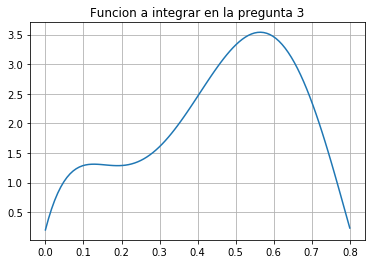

In [12]:
print("///////////////// pregunta 3 DE INTEGRACION NUMERICA I/////////////////////")
def funcionprob3(x):
    return np.float64(0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5)
# graficamos 

lim_inf = 0
lim_sup = 0.8

rango = np.linspace(lim_inf,lim_sup,100)
plt.plot(rango,funcionprob3(rango))
plt.title("Funcion a integrar en la pregunta 3")
plt.grid(True)

# analiticamente
valor0 = 0.2*(lim_sup**1-lim_inf**1)
valor1 = 25/2*(lim_sup**2-lim_inf**2)
valor2 = -200/3*(lim_sup**3-lim_inf**3)
valor3 = 675/4*(lim_sup**4-lim_inf**4)
valor4 = -900/5*(lim_sup**5-lim_inf**5)
valor5 = 400/6*(lim_sup**6-lim_inf**6)
valor_integral = valor0+ valor1 + valor2 + valor3 + valor4 +valor5 
print(f'El valor de la integral analiticamente es : \n {valor_integral}') 
print("-"*100)

# resolvemos 
inte_2puntos = trapezoid(funcion=funcionprob3,inf=lim_inf,sup=lim_sup,n=2,uniform=True)
inte_3puntos = trapezoid(funcion=funcionprob3,inf=lim_inf,sup=lim_sup,n=3,uniform=True)
inte_5puntos = trapezoid(funcion=funcionprob3,inf=lim_inf,sup=lim_sup,n=5,uniform=True)
print(f"El valor de la integral con regla de trapecio n=2 es : \n {inte_2puntos}")
print("-"*100)
print(f"El valor de la integral con regla de trapecio n=3 es : \n {inte_3puntos}")
print("-"*100)
print(f"El valor de la integral con regla de trapecio n=5 es : \n {inte_5puntos}")
print("-"*100)

# mejoramos con la extrapolacion de richardson

inte_aproximado1 = richardson(int1=inte_2puntos,h1=(lim_sup-lim_inf)/2,
                              int2=inte_3puntos,h2=(lim_sup-lim_inf)/3)
print(f'Usando richardosn con 2 puntos y 3 puntos es \n {inte_aproximado1}')
print("-"*100)
inte_aproximado2 = richardson(int1=inte_3puntos,h1=(lim_sup-lim_inf)/3,
                              int2=inte_5puntos,h2=(lim_sup-lim_inf)/5)
print(f'Usando richardosn con 3 puntos y 5 puntos es \n {inte_aproximado2}')
print("-"*100)
inte_aproximado3 = richardson(int1=inte_3puntos,h1=(lim_sup-lim_inf)/3,
                              int2=inte_5puntos,h2=(lim_sup-lim_inf)/5)
print(f'Usando richardosn con 2 puntos y 5 puntos es \n {inte_aproximado3}')

plt.show()